In [77]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [78]:
import tensorflow
import os
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications import ResNet152V2
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import math

In [79]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
test_path = '/content/drive/MyDrive/data/val'

In [80]:
resnet = ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [81]:
for layer in resnet.layers:
    layer.trainable = False

In [82]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [83]:
prediction = Dense(4, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [84]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [85]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 327 images belonging to 4 classes.


In [86]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1952 images belonging to 4 classes.


In [87]:
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)

In [92]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [90]:
training_set
test_set

In [93]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set) // test_set.batch_size  # Use the number of batches in the validation set
)

Epoch 1/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 59s 583ms/step - accuracy: 0.8257 - loss: 1.1973 - val_accuracy: 0.9144 - val_loss: 0.6749
Epoch 2/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9144 - val_loss: 0.6749
Epoch 3/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 413ms/step - accuracy: 0.9289 - loss: 0.4336 - val_accuracy: 0.9052 - val_loss: 0.7452
Epoch 4/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9052 - val_loss: 0.7452
Epoch 5/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 29s 420ms/step - accuracy: 0.9608 - loss: 0.2607 - val_accuracy: 0.9327 - val_loss: 0.4842
Epoch 6/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9327 - val_loss: 0.4842
Epoch 7/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 28s 414ms/step - accuracy: 0.9481 - loss: 0.4540 - val_accuracy: 0.9174 - val_loss: 0.6760
Epoch 8/10
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.0000e+00 - los

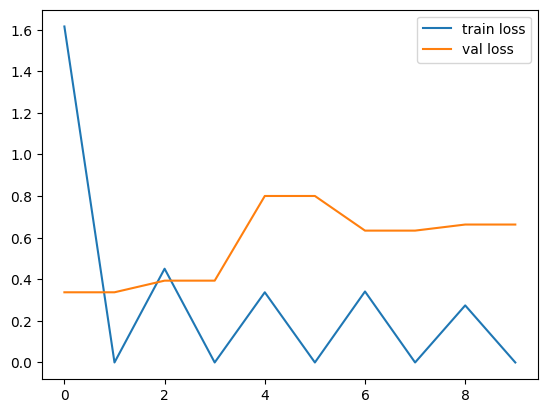

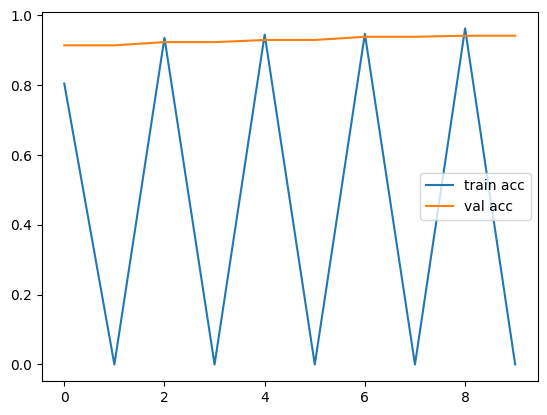

<Figure size 640x480 with 0 Axes>

In [73]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [72]:
print(f"Nombre d'images de validation: {test_set.samples}")

Nombre d'images de validation: 327


In [74]:
from tensorflow.keras.models import load_model

model.save('model_ResNet152V2.h5')